<a href="https://colab.research.google.com/github/Umang1103/Stock-Market-Prediction-using-Numerical-and-Textual-Analysis/blob/main/Stock_Market_Price_prediction_using_numerical_and_textual_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Price Prediction using Numerical & Textual Analysis 💹🪙
#### Written by - Umang Tripathi
This notebook utilises various python's visualizing libraries like Matplotlib and machine learning libraries like sklearn, pandas to predict the stock market price based on the the already available stock price historical data and textual analysis of the news headlines.

## 1. Problem Statement
> Create a hybrid model for stock price prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines.

## 2. Dataset
The historical stock prices dataset can be accessed from the following [link](https://finance.yahoo.com/) and the textual (news) data from [link](https://bit.ly/36fFPI6).

## 3. Evaluation
> The evaluation metric for this task is RMSE(Root Mean Squared Error). The formula for which is:

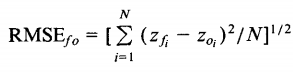

**NOTE:** Our goal will be to minimize RMSE. 

## Importing libraries and datasets

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import datetime
import math

import nltk
import re
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')


from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading stock market historical dataset

In [ ]:
df_price = pd.read_csv("/content/drive/MyDrive/stock_market_price/FDX.csv")
df_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-14,296.720001,297.170013,292.040009,292.989990,289.566223,1275600
1,2021-06-15,294.989990,299.880005,293.899994,299.299988,295.802490,1834000
2,2021-06-16,298.470001,299.390015,292.470001,294.679993,291.236511,1686100
3,2021-06-17,294.489990,294.739990,285.589996,287.570007,284.209595,2369400
4,2021-06-18,284.149994,289.529999,282.010010,285.320007,281.985870,2553800


In [ ]:
len(df_price), df_price.shape, df_price.ndim

(254, (254, 7), 2)

In [ ]:
df_price.index.dtype

dtype('int64')

In [ ]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       254 non-null    object 
 1   Open       254 non-null    float64
 2   High       254 non-null    float64
 3   Low        254 non-null    float64
 4   Close      254 non-null    float64
 5   Adj Close  254 non-null    float64
 6   Volume     254 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [ ]:
df_price.describe()

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,243.443700,246.210906,240.684843,243.314803,242.092911,2.528773e+06
std,28.662216,28.278075,28.874899,28.565927,27.672064,1.650639e+06
min,197.259995,200.479996,192.820007,197.009995,197.009995,9.818000e+05
25%,220.000000,223.384998,217.312497,221.264999,220.119000,1.750225e+06
50%,241.740005,245.195000,239.245003,241.414993,240.596870,2.115850e+06
75%,262.517494,264.580010,259.192498,262.062500,260.974877,2.641800e+06
max,301.700012,304.589996,298.980011,303.690002,300.141205,1.779240e+07


In [ ]:
# Dropping off the NaN values as we won't be needing them during modelling
df_price.dropna(inplace=True)

In [ ]:
# Since the datatype of 'date' is object. We need to convert it to datetime.
df_price['Date'] = pd.to_datetime(df_price['Date'])
df_price

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-14,296.720001,297.170013,292.040009,292.989990,289.566223,1275600
1,2021-06-15,294.989990,299.880005,293.899994,299.299988,295.802490,1834000
2,2021-06-16,298.470001,299.390015,292.470001,294.679993,291.236511,1686100
3,2021-06-17,294.489990,294.739990,285.589996,287.570007,284.209595,2369400
4,2021-06-18,284.149994,289.529999,282.010010,285.320007,281.985870,2553800
...,...,...,...,...,...,...,...
249,2022-06-08,217.880005,220.529999,215.729996,217.169998,217.169998,1556300
250,2022-06-09,217.199997,221.360001,215.399994,217.000000,217.000000,1846500
251,2022-06-10,214.139999,215.119995,206.630005,206.770004,206.770004,2263300
252,2022-06-13,201.500000,205.050003,198.419998,200.979996,200.979996,1983000


### Visualizing the historical stock market dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


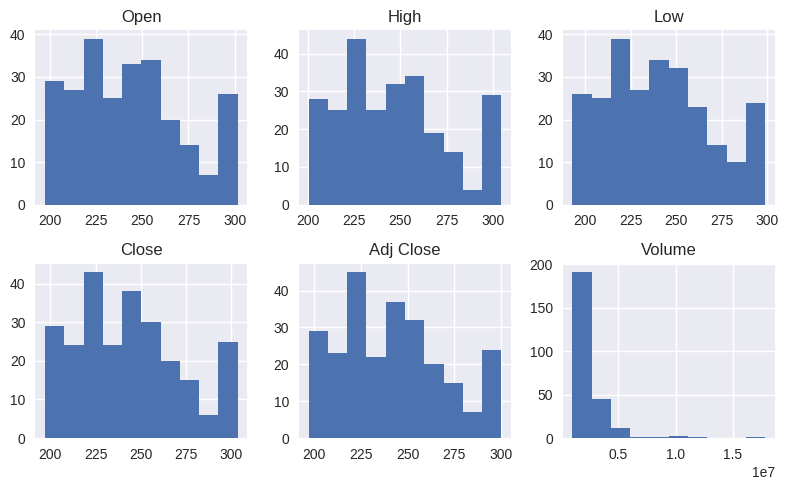

In [ ]:
# Graphical representation of the distribution of each column of dataset
plt.style.use('seaborn')

fig, ax = plt.subplots(figsize=(8, 5), dpi=100)

df_price.loc[:, df_price.columns != 'Date'].hist(ax=ax, layout=(2, 3));
plt.tight_layout();

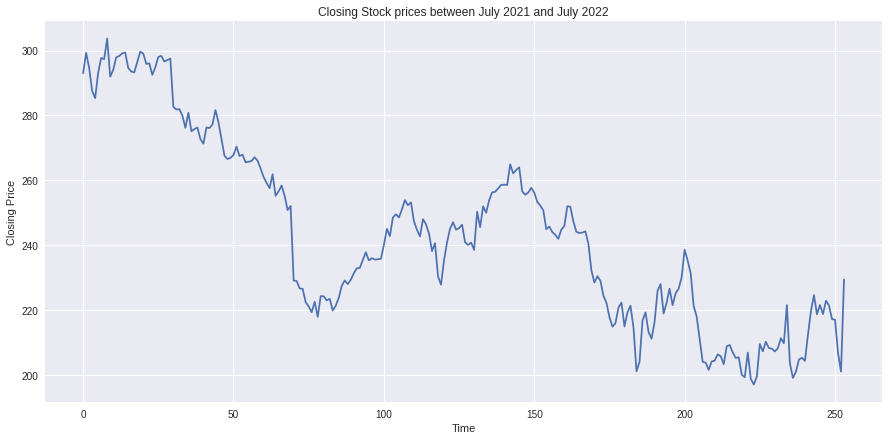

In [ ]:
# Closing Prices
df_price['Close'].plot(figsize=(15, 7));
plt.title("Closing Stock prices between July 2021 and July 2022")
plt.ylabel("Closing Price")
plt.xlabel("Time");

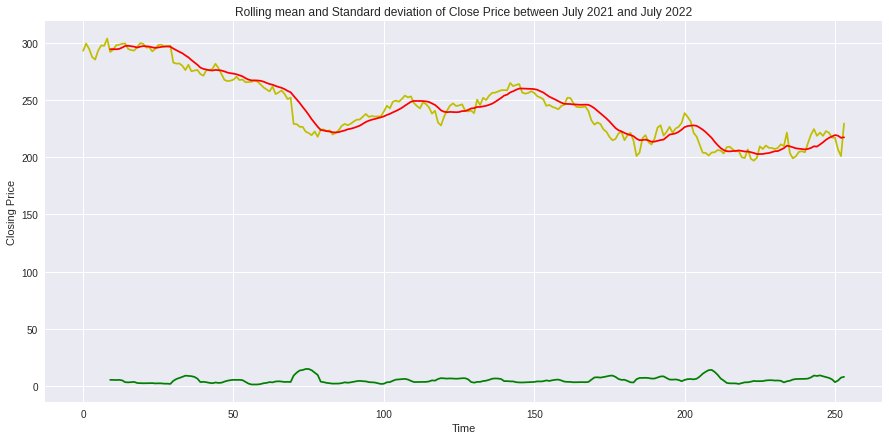

In [ ]:
# Closing Prices
close = df_price['Close']
mean = close.rolling(window=10).mean()
std = close.rolling(window=10).std()

df_price['Close'].plot(figsize=(15, 7), label='Close', c='y');
# Rolling Mean for closing price
mean.plot(label='Rolling Mean', c='r')
# Rolling std for closing price
std.plot(label='Rolling Standard Deviation', c='g')
plt.title("Rolling mean and Standard deviation of Close Price between July 2021 and July 2022")
plt.ylabel("Closing Price")
plt.xlabel("Time");

### Loading the news-headlines dataset

In [ ]:
# Read the news headlines dataset
df_news = pd.read_csv("/content/drive/MyDrive/stock_market_price/india-news-headlines.csv")
df_news = df_news.dropna(axis = 0, how ='any')
df_news.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [ ]:
len(df_news), df_news.shape, df_news.ndim

(3650970, (3650970, 3), 2)

In [ ]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3650970 entries, 0 to 3650969
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 111.4+ MB


### Preprocessing the dataset for modelling

In [ ]:
# Dropping 0 values, and the Category column as we don't require this for our analysis.
df_news.drop('headline_category', axis = 1, inplace=True)

In [ ]:
# Convert the date column to the specified date-type.
df_news['publish_date'] = pd.to_datetime(df_news['publish_date'], format='%Y%m%d')
df_news

,publish_date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic
...,...,...
3650965,2022-03-31,J&K sacks 2 cops; 3 other employees over terro...
3650966,2022-03-31,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650967,2022-03-31,As Covid-19 cases drop to nil in southern dist...
3650968,2022-03-31,Tamil Nadu sees marginal rise of Covid cases w...


In [ ]:
# Renames the columns
df_news. rename(columns = {'publish_date':'Date', 
                           'headline_text':'News'}, 
           inplace = True)

In [ ]:
# Removes the duplicate data 
df_news['News'] = df_news.groupby(['Date']).transform(lambda x : ' '.join(x)) 
df_news = df_news.drop_duplicates() 
df_news.reset_index(inplace = True, drop = True)
df_news

,Date,News
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,Powerless north India gropes in the dark Think...
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...
...,...,...
7712,2022-03-27,Playing a dead man in Body God meant sitting i...
7713,2022-03-28,As fashion becomes democratic; demand for styl...
7714,2022-03-29,Bobby Deol: Like my dad; I hope to be working ...
7715,2022-03-30,I will not give in to trends: Dossmode The tim...


In [ ]:
# Cleaning headlines
# removing unwanted characters from the News
df_news.replace("[^a-zA-Z']"," ",regex=True,inplace=True)
df_news["News"].head(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


0    Status quo will not be disturbed at Ayodhya  s...
1    Powerless north India gropes in the dark Think...
2    The string that pulled Stephen Hawking to Indi...
3    Light combat craft takes India into club class...
4    Light combat craft takes India into club class...
Name: News, dtype: object

#### Sentimental Analysis on the news headlines

In [ ]:
#Functions to get the subjectivity and polarity scores using TextBlob module
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [ ]:
#Adding subjectivity and polarity columns
df_news['Subjectivity'] = df_news['News'].apply(getSubjectivity)
df_news['Polarity'] = df_news['News'].apply(getPolarity)
df_news

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,News,Subjectivity,Polarity
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...,0.286859,0.143590
1,2001-01-03,Powerless north India gropes in the dark Think...,0.392857,0.089286
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.445360,0.093039
3,2001-01-05,Light combat craft takes India into club class...,0.480553,0.264024
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485
...,...,...,...,...
7712,2022-03-27,Playing a dead man in Body God meant sitting i...,0.365123,0.034162
7713,2022-03-28,As fashion becomes democratic demand for styl...,0.383007,0.058513
7714,2022-03-29,Bobby Deol Like my dad I hope to be working ...,0.403627,0.092144
7715,2022-03-30,I will not give in to trends Dossmode The tim...,0.344136,0.039954


In [ ]:
# Instantiating the sentiment analyzer
sia = SentimentIntensityAnalyzer()

df_news['Compound'] = [sia.polarity_scores(v)['compound'] for v in df_news['News']]
df_news['Negative'] = [sia.polarity_scores(v)['neg'] for v in df_news['News']]
df_news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in df_news['News']]
df_news['Positive'] = [sia.polarity_scores(v)['pos'] for v in df_news['News']]
df_news

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...,0.286859,0.143590,-0.9792,0.121,0.809,0.071
1,2001-01-03,Powerless north India gropes in the dark Think...,0.392857,0.089286,-0.8910,0.156,0.735,0.109
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.445360,0.093039,0.7543,0.104,0.792,0.104
3,2001-01-05,Light combat craft takes India into club class...,0.480553,0.264024,0.9645,0.142,0.694,0.164
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485,-0.8316,0.214,0.655,0.131
...,...,...,...,...,...,...,...,...
7712,2022-03-27,Playing a dead man in Body God meant sitting i...,0.365123,0.034162,-0.9999,0.158,0.758,0.084
7713,2022-03-28,As fashion becomes democratic demand for styl...,0.383007,0.058513,-0.9999,0.160,0.737,0.103
7714,2022-03-29,Bobby Deol Like my dad I hope to be working ...,0.403627,0.092144,-0.9999,0.159,0.755,0.086
7715,2022-03-30,I will not give in to trends Dossmode The tim...,0.344136,0.039954,-0.9999,0.156,0.769,0.076


In [ ]:
# Save the df_news dataset
df_news.to_csv("df_news.csv")
print("Saved successfully.")

Saved successfully.


### Preparing the final dataset
> We'll prepare the final dataset by combining the sentimental analysis results with the historical prices data for predicting the stock prices using **Multivariate Time Series Forecasting**.

In [ ]:
# Merging both the datasets
df_final = pd.merge(df_price, df_news, how='inner', on='Date')
# Dropping the non-required columns
df_final.drop(['Date', 'News'], axis=1, inplace=True)
df_final

,Open,High,Low,Close,Adj Close,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,296.720001,297.170013,292.040009,292.989990,289.566223,1275600,0.385541,0.062530,-0.9999,0.156,0.754,0.090
1,294.989990,299.880005,293.899994,299.299988,295.802490,1834000,0.379246,0.027786,-1.0000,0.164,0.761,0.075
2,298.470001,299.390015,292.470001,294.679993,291.236511,1686100,0.376999,0.054682,-0.9998,0.137,0.778,0.085
3,294.489990,294.739990,285.589996,287.570007,284.209595,2369400,0.371694,0.028110,-0.9999,0.164,0.759,0.077
4,284.149994,289.529999,282.010010,285.320007,281.985870,2553800,0.398263,0.067817,-0.9999,0.147,0.773,0.080
...,...,...,...,...,...,...,...,...,...,...,...,...
198,225.990005,227.050003,223.960007,226.559998,226.559998,1452900,0.373221,-0.003922,-1.0000,0.184,0.742,0.074
199,226.839996,230.160004,225.619995,230.050003,230.050003,1728100,0.383007,0.058513,-0.9999,0.160,0.737,0.103
200,236.750000,241.570007,236.050003,238.570007,238.570007,4055800,0.403627,0.092144,-0.9999,0.159,0.755,0.086
201,237.250000,238.190002,234.149994,235.250000,235.250000,2111300,0.344136,0.039954,-0.9999,0.156,0.769,0.076


In [ ]:
len(df_final), len(df_price), len(df_news), df_final.shape, df_final.ndim

(203, 254, 7717, (203, 12), 2)

In [ ]:
# Getting our data series ready for Multivariate Time Series Forecasting
from pandas import DataFrame as df
from pandas import concat
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df1 = df(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df1.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df1.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [ ]:
# Scale our data for optimal performance
values = df_final.values.astype('float32')
# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# Frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# Drop columns we don't want to predict
reframed.drop(reframed.columns[[12,13,14,16,17,18,19,20,21,22,23]], axis=1, inplace=True)
print(reframed.columns)

Index(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
       'var6(t-1)', 'var7(t-1)', 'var8(t-1)', 'var9(t-1)', 'var10(t-1)',
       'var11(t-1)', 'var12(t-1)', 'var4(t)'],
      dtype='object')


## Constructing the hybrid model
> We'll use LSTM(Long Short Term Memory), a type of RNN cell used to make predictions on sequential data.

### Creating the train and test splits for training and prediction

In [89]:
reframed.values.shape, len(values)

((202, 13), 202)

In [90]:
# split into train and test sets
values = reframed.values
n_train_hours = int(0.8*len(values))
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
X_train, y_train = train[:, :-1], train[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(161, 1, 12) (161,) (41, 1, 12) (41,)


### Constructing the model

#### 1. Model 0: Baseline Model

In [91]:
# Creating the model
input = layers.Input(shape=(X_train.shape[1], X_train.shape[2]), dtype=tf.float32)
x = layers.LSTM(32)(input)
output = layers.Dense(1)(x)
model_0 = tf.keras.Model(input, output, name='LSTM_model')

In [92]:
model_0.summary()

Model: "LSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1, 12)]           0         
                                                                 
 lstm_9 (LSTM)               (None, 32)                5760      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,793
Trainable params: 5,793
Non-trainable params: 0
_________________________________________________________________


In [93]:
# compile the model
model_0.compile(loss='mse',
                optimizer='adam',
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Fit the model
model_0_history = model_0.fit(X_train,
                              y_train,
                              epochs=50,
                              validation_data=[X_test, y_test])

Epoch 1/50
6/6 [==============================] - 2s 86ms/step - loss: 0.2823 - root_mean_squared_error: 0.5313 - val_loss: 0.0491 - val_root_mean_squared_error: 0.2216
Epoch 2/50
6/6 [==============================] - 0s 9ms/step - loss: 0.2085 - root_mean_squared_error: 0.4566 - val_loss: 0.0290 - val_root_mean_squared_error: 0.1703
Epoch 3/50
6/6 [==============================] - 0s 8ms/step - loss: 0.1467 - root_mean_squared_error: 0.3830 - val_loss: 0.0150 - val_root_mean_squared_error: 0.1224
Epoch 4/50
6/6 [==============================] - 0s 8ms/step - loss: 0.0972 - root_mean_squared_error: 0.3117 - val_loss: 0.0070 - val_root_mean_squared_error: 0.0838
Epoch 5/50
6/6 [==============================] - 0s 8ms/step - loss: 0.0608 - root_mean_squared_error: 0.2466 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0654
Epoch 6/50
6/6 [==============================] - 0s 8ms/step - loss: 0.0345 - root_mean_squared_error: 0.1856 - val_loss: 0.0060 - val_root_mean_squared_error

#### Model Evaluation

In [94]:
# Evaluate the baseline model
model_0.evaluate(X_test)

2/2 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - root_mean_squared_error: 0.0000e+00


[0.0, 0.0]

In [95]:
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[2]))
y_preds = model_0.predict(X_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[2]))
# invert scaling for forecast
inv_y_preds = np.concatenate((y_preds, X_test[:, 1:]), axis=1)
inv_y_preds = scaler.inverse_transform(inv_y_preds)
inv_y_preds = inv_y_preds[:,0]
# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
inv_y = np.concatenate((y_test, X_test[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = math.sqrt(mean_squared_error(inv_y, inv_y_preds))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 5.673


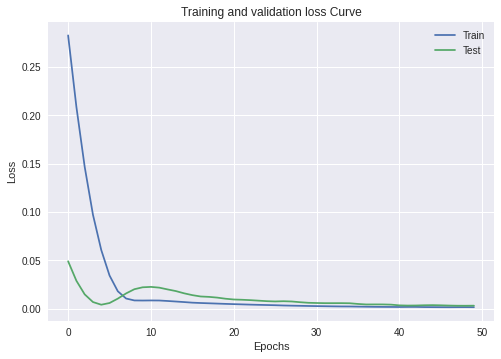

In [96]:
# Plotting the losses
plt.plot(model_0_history.history['loss'], label='Train')
plt.plot(model_0_history.history['val_loss'], label='Test')
plt.title("Training and validation loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

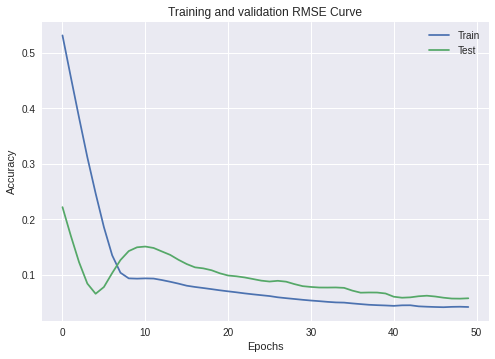

In [97]:
# Plotting the RMSE Curve
plt.plot(model_0_history.history['root_mean_squared_error'], label='Train')
plt.plot(model_0_history.history['val_root_mean_squared_error'], label='Test')
plt.title("Training and validation RMSE Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend();